# the simplest possible autoencoder

In [2]:
import tensorflow as tf
import keras 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [4]:
# create a separate encoder model

In [5]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [6]:
# As well as the decoder model

In [7]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [8]:
# train our autoencoder to reconstruct MNIST digits

In [9]:
 # configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer
    
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
#prepare our input data. We're using MNIST digits, and we're discarding the labels 
# (since we're only interested in encoding/decoding the input images)

In [12]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 809s 70us/step


In [15]:
#We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [16]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
# train our autoencoder for 50 epochs:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 6s 13ms/step - loss: 0.3984 - val_loss: 0.0950
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0425 - val_loss: 0.0191
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0134 - val_loss: 0.0096
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0080 - val_loss: 0.0068
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0062 - val_loss: 0.0057
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0045 - val_lo

In [19]:
'''After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09.
We can try to visualize the reconstructed inputs and the encoded representations.
We will use Matplotlib.
'''

'After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09.\nWe can try to visualize the reconstructed inputs and the encoded representations.\nWe will use Matplotlib.\n'

In [20]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

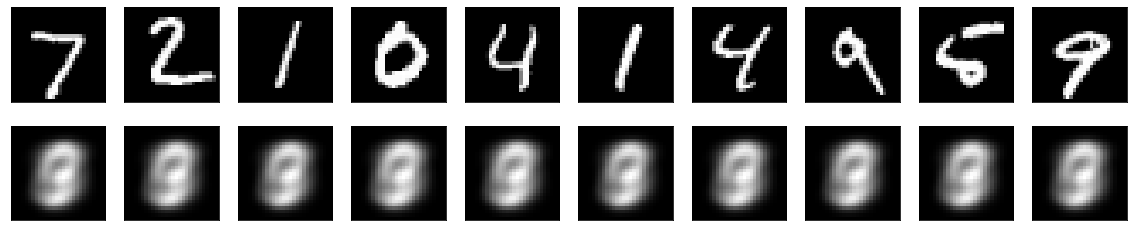

In [21]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
# Adding a sparsity constraint on the encoded representations


In [24]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

# Deep autoencoder


In [25]:
# We do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers, such as:


input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [26]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 5s 19ms/step - loss: 0.0966 - val_loss: 0.0041
Epoch 2/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 3/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 4/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 5/100
235/235 [==============================] - 6s 23ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/100
235/235 [==============================] - 5s 23ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 7/100
235/235 [==============================] - 4s 19ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 8/100
235/235 [==============================] - 5s 19ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 9/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 10/100
235/235 [==============================] - 6s 24ms/step - loss: 0.003

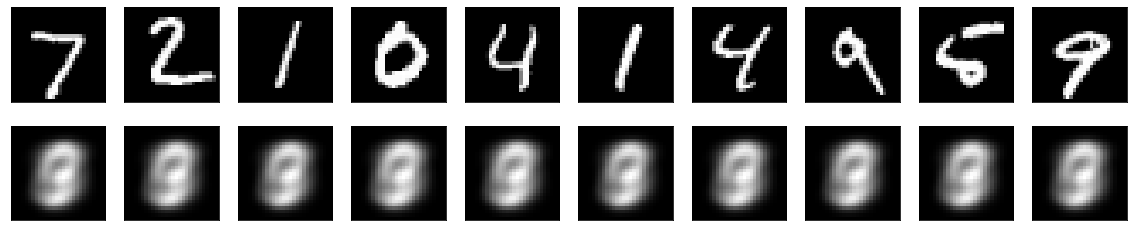

In [28]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional autoencoder


In [36]:
'''Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders.
In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers
(max pooling being used for spatial down-sampling), while the decoder will consist in a stack of 
Conv2D and UpSampling2D layers.
'''

In [37]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [38]:
# To train it, we will use the original MNIST digits with shape (samples, 3, 28, 28), and we will just
# normalize pixel values between 0 and 1.



In [39]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [40]:
# First, let's open up a terminal and start a TensorBoard server that will read logs stored at /tmp/autoencoder.



In [41]:
tensorboard --logdir=/tmp/autoencoder

# Then let's train our model. In the callbacks list we pass an instance of the TensorBoard callback. After every epoch, 
# this callback will write logs to /tmp/autoencoder, which can be read by our TensorBoard server.



In [42]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()